In [252]:
import numpy as np
from matplotlib import pyplot as plt

## Generate Random Data Points

In [253]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define constants
TARGET_SLOPE: int = np.random.choice([-3, -2, -1, 1, 2, 3])
TARGET_INTERCEPT: int = np.random.randint(-5, 5)  # -5 to 5
N_SAMPLES: int = 150

# Generate random samples for x and calculate y
x: np.ndarray = np.random.rand(N_SAMPLES, 1) * 10  # 0 to 10
y: np.ndarray = TARGET_SLOPE * x + TARGET_INTERCEPT + np.random.randn(N_SAMPLES, 1)

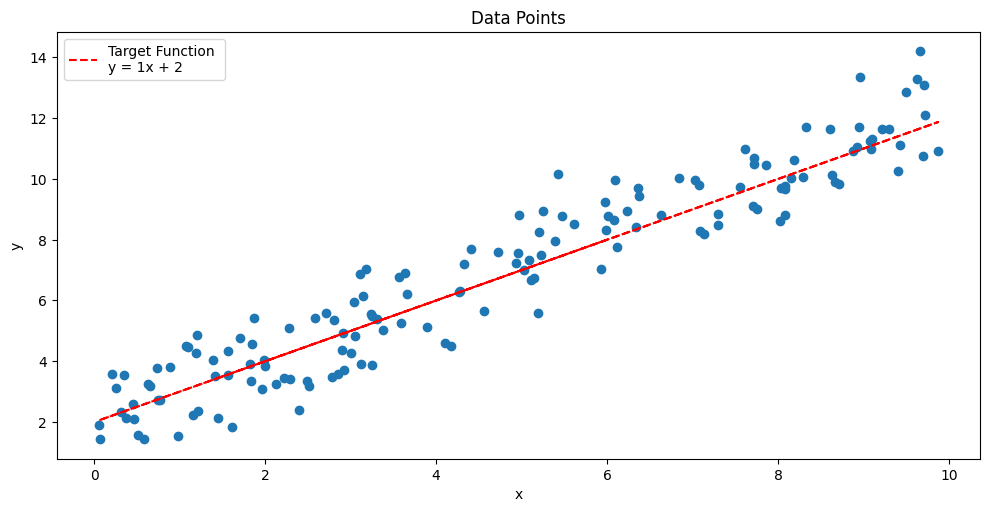

In [254]:
fig = plt.figure(figsize=(10, 5))

# Plot the target function
plt.plot(
    x,
    TARGET_SLOPE * x + TARGET_INTERCEPT,
    color="red",
    label=f"Target Function \ny = {TARGET_SLOPE}x + {TARGET_INTERCEPT}",
    linewidth=1.5,
    linestyle="--",
)

# Scatter plot of the data points
plt.scatter(x, y)

# Set labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.title("Data Points")

plt.show()

## Implement Linear Regression

#### Use covariance and variance for slope and intercept calculation

In [255]:
import numpy as np
from typing import Optional

class LinearRegression:
    def __init__(self):
        """
        Initialize the LinearRegression model with slope (k) and intercept (b) set to None.
        """
        self.k: Optional[float] = None
        self.b: Optional[float] = None

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear regression model using the provided data.

        Parameters:
        x (np.ndarray): The input feature array.
        y (np.ndarray): The target array.
        """
        self.n_samples: int = x.shape[0]
        x_mean: float = np.mean(x)
        y_mean: float = np.mean(y)

        # Calculate covariance and variance
        covariance: float = np.sum((x - x_mean) * (y - y_mean)) / self.n_samples
        variance: float = np.sum((x - x_mean) ** 2) / self.n_samples

        # Calculate slope (k) and intercept (b)
        self.k = covariance / variance
        self.b = y_mean - self.k * x_mean

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the target values using the fitted linear regression model.

        Parameters:
        x (np.ndarray): The input feature array.

        Returns:
        np.ndarray: The predicted target values.
        """
        if self.k is None or self.b is None:
            raise ValueError("Fit the model first")
        return self.k * x + self.b

## Test the Linear Regression

In [256]:
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

## Plot the Predictions

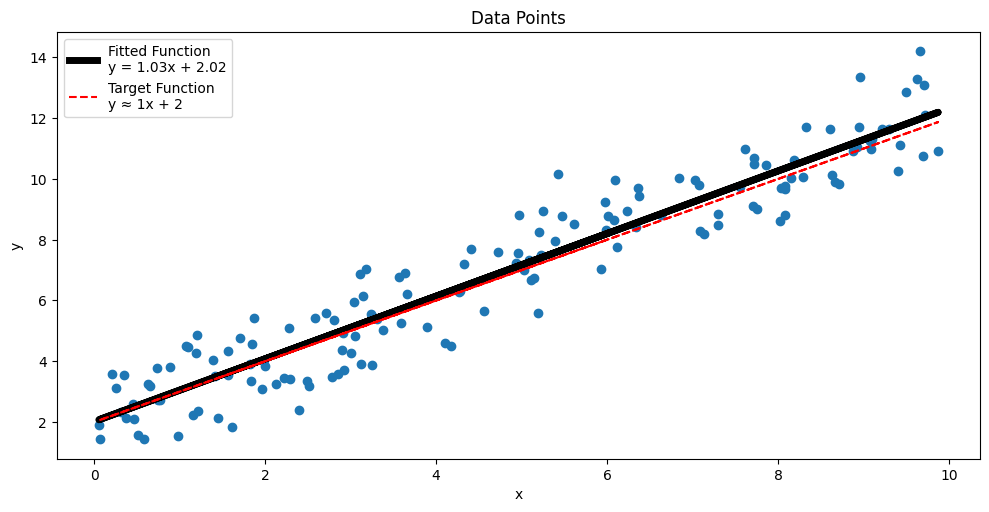

In [257]:
fig = plt.figure(figsize=(10, 5))

# Plot the fitted function
plt.plot(
    x,
    y_pred,
    color="black",
    label=f"Fitted Function \ny = {lr.k:.2f}x + {lr.b:.2f}",
    linewidth=5,
)

# Plot the target function
plt.plot(
    x,
    TARGET_SLOPE * x + TARGET_INTERCEPT,
    color="red",
    label=f"Target Function \ny ≈ {TARGET_SLOPE}x + {TARGET_INTERCEPT}",
    linewidth=1.5,
    linestyle="--",
)

# Scatter plot of the data points
plt.scatter(x, y)

# Set labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.title("Data Points")

plt.show()